In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_openml
import numpy as np
from Plotter import *
from FFNN import FFNN

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data
y = mnist.target.astype(np.int32)

np.random.seed(42)
indices = np.random.choice(len(X), 20000, replace=False)
X = X[indices]
y = y[indices]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

y_one_hot = np.zeros((len(y), 10))
y_one_hot[np.arange(len(y)), y] = 1

X_train, X_temp, y_train, y_temp = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

plotter = Plotter()

In [3]:
ffnn1 = FFNN(
    input_size=784,
    hidden_sizes=[256, 128],
    output_size=10,
    learning_rate=0.001,
    hidden_activations=['relu', 'relu'],
    output_activation='softmax',
    loss_function='cce',
    reg_type='l2',
    reg_lambda=0.001,
    rms_norm=True,
    init_type='he',
    seed=69420
)
ffnn1.train(X_train, y_train, X_val, y_val, epochs=20, batch_size=32, verbose=1)

correct = 0
for inputs, target in zip(X_test, y_test):
    prediction = ffnn1.predict(inputs)
    predicted_class = np.argmax(prediction)
    actual_class = np.argmax(target)
    if predicted_class == actual_class:
        correct += 1

print(f"Akurasi: {correct / len(y_test) * 100:.2f}%")

Epoch 1/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 107.18it/s, loss=0.182]


Train Loss: 0.1819 - Val Loss: 0.0868


Epoch 2/20: 100%|███████████████████████████████████| 438/438 [00:01<00:00, 221.65it/s, loss=0.0739]


Train Loss: 0.0739 - Val Loss: 0.0640


Epoch 3/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 133.27it/s, loss=0.0628]


Train Loss: 0.0628 - Val Loss: 0.0593


Epoch 4/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 116.95it/s, loss=0.0598]


Train Loss: 0.0598 - Val Loss: 0.0576


Epoch 5/20: 100%|████████████████████████████████████| 438/438 [00:05<00:00, 81.05it/s, loss=0.0584]


Train Loss: 0.0584 - Val Loss: 0.0566


Epoch 6/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 108.34it/s, loss=0.0575]


Train Loss: 0.0575 - Val Loss: 0.0558


Epoch 7/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 100.87it/s, loss=0.0568]


Train Loss: 0.0568 - Val Loss: 0.0555


Epoch 8/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 110.38it/s, loss=0.0562]


Train Loss: 0.0562 - Val Loss: 0.0551


Epoch 9/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 96.78it/s, loss=0.0557]


Train Loss: 0.0557 - Val Loss: 0.0548


Epoch 10/20: 100%|██████████████████████████████████| 438/438 [00:01<00:00, 226.75it/s, loss=0.0553]


Train Loss: 0.0553 - Val Loss: 0.0545


Epoch 11/20: 100%|████████████████████████████████████| 438/438 [00:05<00:00, 74.62it/s, loss=0.055]


Train Loss: 0.0550 - Val Loss: 0.0544


Epoch 12/20: 100%|███████████████████████████████████| 438/438 [00:06<00:00, 72.31it/s, loss=0.0547]


Train Loss: 0.0547 - Val Loss: 0.0541


Epoch 13/20: 100%|███████████████████████████████████| 438/438 [00:05<00:00, 84.05it/s, loss=0.0544]


Train Loss: 0.0544 - Val Loss: 0.0538


Epoch 14/20: 100%|██████████████████████████████████| 438/438 [00:04<00:00, 105.16it/s, loss=0.0542]


Train Loss: 0.0542 - Val Loss: 0.0536


Epoch 15/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 95.67it/s, loss=0.054]


Train Loss: 0.0540 - Val Loss: 0.0535


Epoch 16/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 92.41it/s, loss=0.0538]


Train Loss: 0.0538 - Val Loss: 0.0534


Epoch 17/20: 100%|███████████████████████████████████| 438/438 [00:07<00:00, 56.99it/s, loss=0.0537]


Train Loss: 0.0537 - Val Loss: 0.0534


Epoch 18/20: 100%|███████████████████████████████████| 438/438 [00:06<00:00, 63.53it/s, loss=0.0536]


Train Loss: 0.0536 - Val Loss: 0.0533


Epoch 19/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 98.37it/s, loss=0.0535]


Train Loss: 0.0535 - Val Loss: 0.0533


Epoch 20/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 91.42it/s, loss=0.0534]


Train Loss: 0.0534 - Val Loss: 0.0533
Akurasi: 93.87%


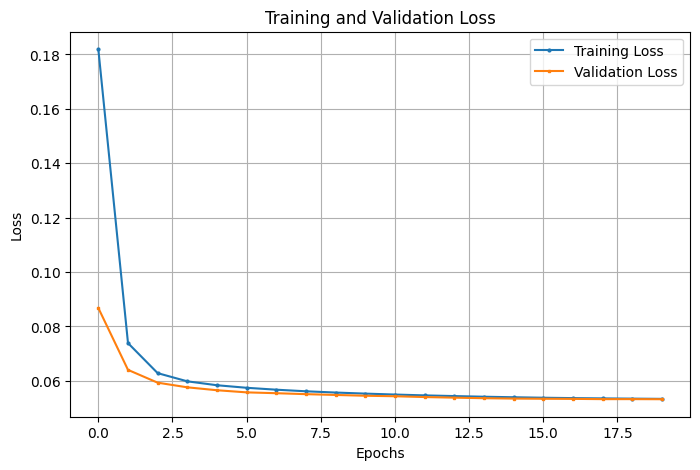

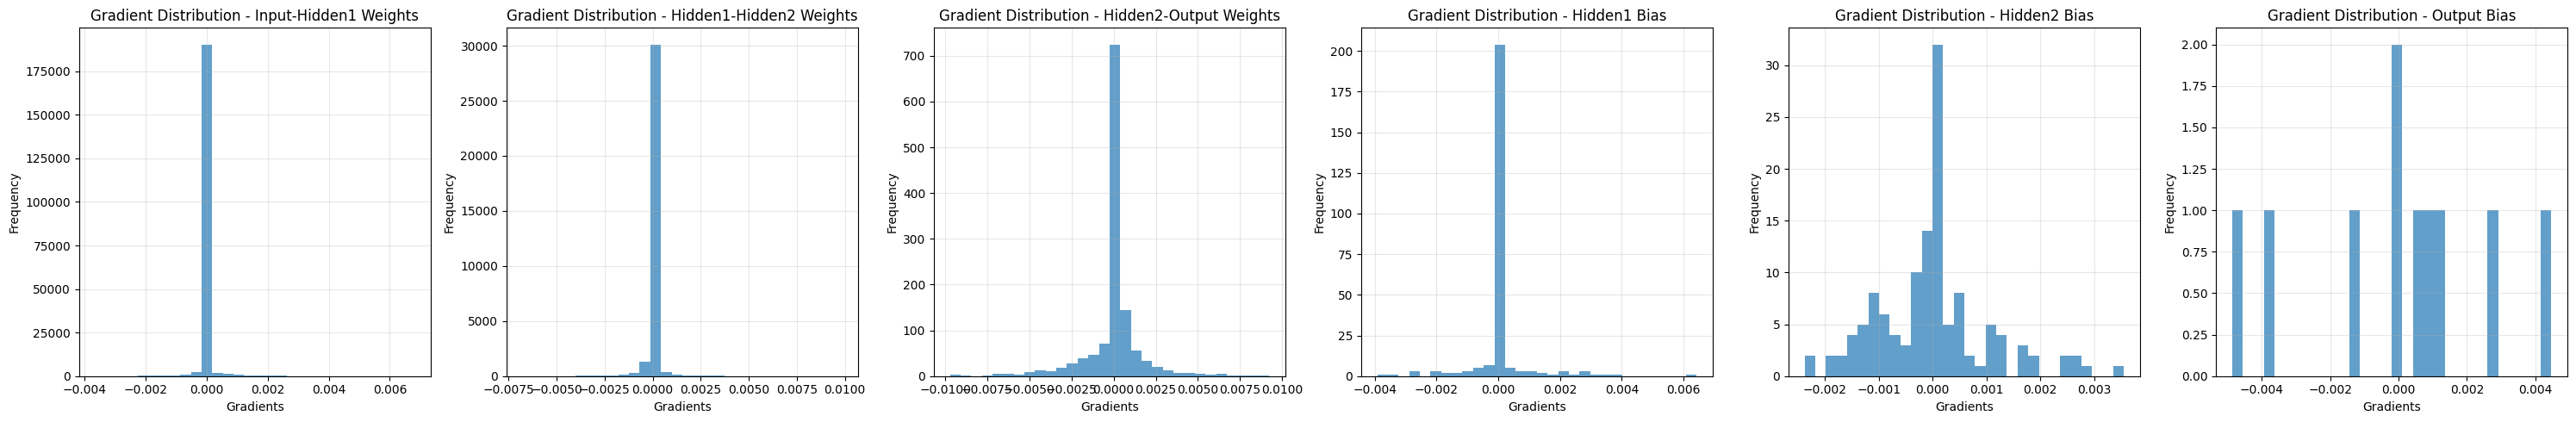

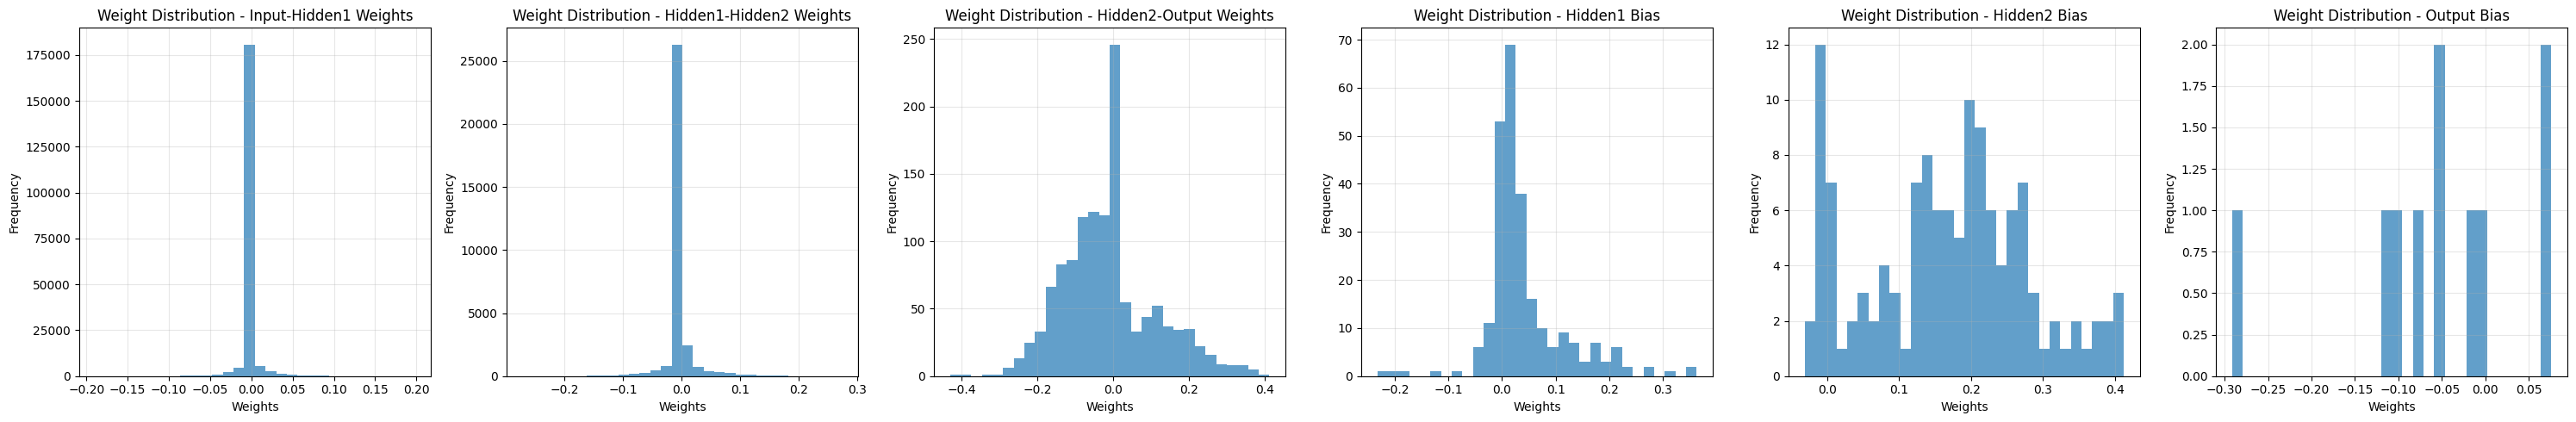

In [4]:
plotter.plot_training_history(ffnn1)
plotter.plot_gradient_distributions(ffnn1)
plotter.plot_weight_distributions(ffnn1)

In [5]:
ffnn2 = FFNN(
    input_size=784,
    hidden_sizes=[256, 128],
    output_size=10,
    learning_rate=0.01,
    hidden_activations=['relu', 'relu'],
    output_activation='softmax',
    loss_function='cce',
    reg_type='l2',
    reg_lambda=0.001,
    rms_norm=True,
    init_type='he',
    seed=69420
)
ffnn2.train(X_train, y_train, X_val, y_val, epochs=20, batch_size=32, verbose=1)

correct = 0
for inputs, target in zip(X_test, y_test):
    prediction = ffnn2.predict(inputs)
    predicted_class = np.argmax(prediction)
    actual_class = np.argmax(target)
    if predicted_class == actual_class:
        correct += 1

print(f"Akurasi: {correct / len(y_test) * 100:.2f}%")

Epoch 1/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 102.22it/s, loss=0.118]


Train Loss: 0.1185 - Val Loss: 0.0832


Epoch 2/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 109.18it/s, loss=0.0819]


Train Loss: 0.0819 - Val Loss: 0.0789


Epoch 3/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 90.77it/s, loss=0.0795]


Train Loss: 0.0795 - Val Loss: 0.0803


Epoch 4/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 122.73it/s, loss=0.0782]


Train Loss: 0.0782 - Val Loss: 0.0723


Epoch 5/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 88.60it/s, loss=0.0768]


Train Loss: 0.0768 - Val Loss: 0.0731


Epoch 6/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 94.80it/s, loss=0.0758]


Train Loss: 0.0758 - Val Loss: 0.0687


Epoch 7/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 101.12it/s, loss=0.075]


Train Loss: 0.0750 - Val Loss: 0.0712


Epoch 8/20: 100%|███████████████████████████████████| 438/438 [00:01<00:00, 285.62it/s, loss=0.0747]


Train Loss: 0.0747 - Val Loss: 0.0747


Epoch 9/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 109.28it/s, loss=0.0746]


Train Loss: 0.0746 - Val Loss: 0.0727


Epoch 10/20: 100%|██████████████████████████████████| 438/438 [00:03<00:00, 118.22it/s, loss=0.0745]


Train Loss: 0.0745 - Val Loss: 0.0752


Epoch 11/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 99.00it/s, loss=0.0742]


Train Loss: 0.0742 - Val Loss: 0.0746


Epoch 12/20: 100%|███████████████████████████████████| 438/438 [00:05<00:00, 85.27it/s, loss=0.0742]


Train Loss: 0.0742 - Val Loss: 0.0734


Epoch 13/20: 100%|████████████████████████████████████| 438/438 [00:06<00:00, 71.87it/s, loss=0.074]


Train Loss: 0.0740 - Val Loss: 0.0751


Epoch 14/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 93.04it/s, loss=0.0738]


Train Loss: 0.0738 - Val Loss: 0.0743


Epoch 15/20: 100%|██████████████████████████████████| 438/438 [00:02<00:00, 204.37it/s, loss=0.0738]


Train Loss: 0.0738 - Val Loss: 0.0755


Epoch 16/20: 100%|██████████████████████████████████| 438/438 [00:04<00:00, 103.64it/s, loss=0.0737]


Train Loss: 0.0737 - Val Loss: 0.0751


Epoch 17/20: 100%|██████████████████████████████████| 438/438 [00:04<00:00, 105.47it/s, loss=0.0736]


Train Loss: 0.0736 - Val Loss: 0.0742


Epoch 18/20: 100%|███████████████████████████████████| 438/438 [00:06<00:00, 64.28it/s, loss=0.0737]


Train Loss: 0.0737 - Val Loss: 0.0747


Epoch 19/20: 100%|██████████████████████████████████| 438/438 [00:04<00:00, 102.14it/s, loss=0.0737]


Train Loss: 0.0737 - Val Loss: 0.0740


Epoch 20/20: 100%|██████████████████████████████████| 438/438 [00:03<00:00, 119.48it/s, loss=0.0735]


Train Loss: 0.0735 - Val Loss: 0.0719
Akurasi: 87.67%


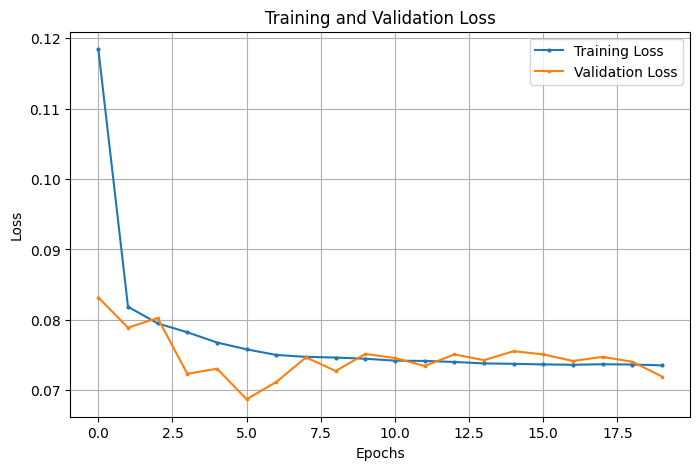

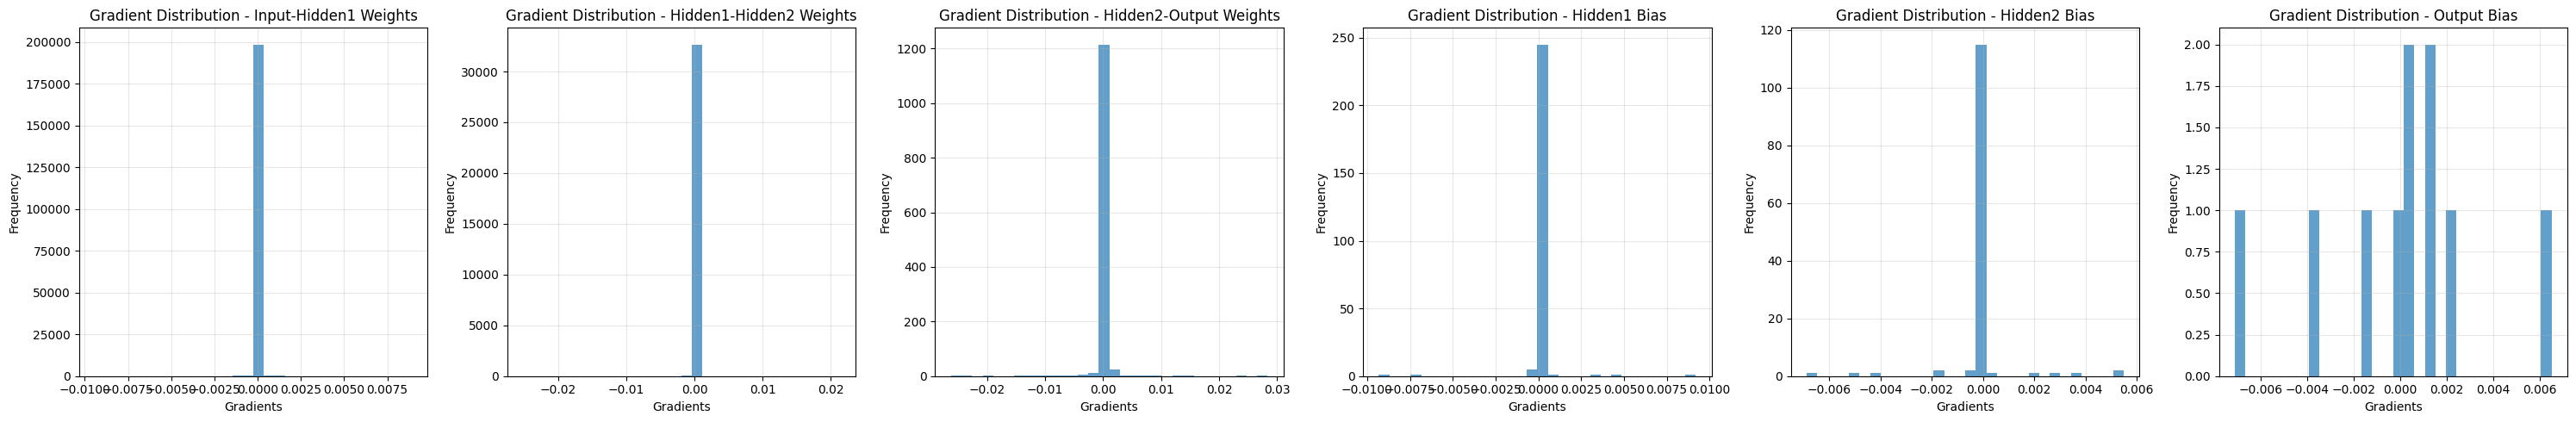

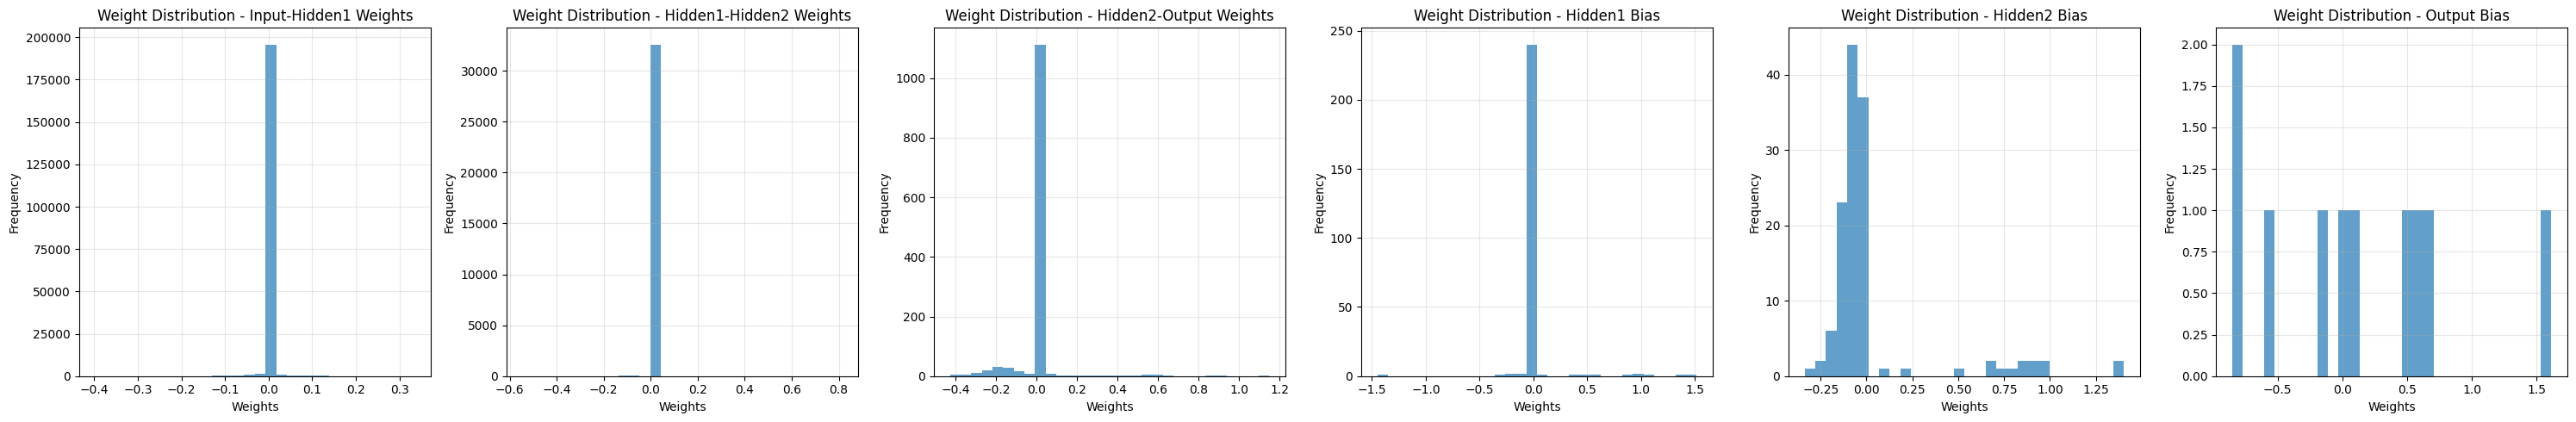

In [6]:
plotter.plot_training_history(ffnn2)
plotter.plot_gradient_distributions(ffnn2)
plotter.plot_weight_distributions(ffnn2)

In [7]:
ffnn3 = FFNN(
    input_size=784,
    hidden_sizes=[256, 128],
    output_size=10,
    learning_rate=0.1,
    hidden_activations=['relu', 'relu'],
    output_activation='softmax',
    loss_function='cce',
    reg_type='l2',
    reg_lambda=0.001,
    rms_norm=True,
    init_type='he',
    seed=69420
)
ffnn3.train(X_train, y_train, X_val, y_val, epochs=20, batch_size=32, verbose=1)

correct = 0
for inputs, target in zip(X_test, y_test):
    prediction = ffnn3.predict(inputs)
    predicted_class = np.argmax(prediction)
    actual_class = np.argmax(target)
    if predicted_class == actual_class:
        correct += 1

print(f"Akurasi: {correct / len(y_test) * 100:.2f}%")

Epoch 1/20: 100%|████████████████████████████████████| 438/438 [00:02<00:00, 196.38it/s, loss=0.323]


Train Loss: 0.3235 - Val Loss: 0.2342


Epoch 2/20: 100%|█████████████████████████████████████| 438/438 [00:05<00:00, 81.88it/s, loss=0.231]


Train Loss: 0.2314 - Val Loss: 0.2342


Epoch 3/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 102.98it/s, loss=0.231]


Train Loss: 0.2314 - Val Loss: 0.2342


Epoch 4/20: 100%|████████████████████████████████████| 438/438 [00:03<00:00, 120.50it/s, loss=0.231]


Train Loss: 0.2314 - Val Loss: 0.2342


Epoch 5/20: 100%|████████████████████████████████████| 438/438 [00:03<00:00, 112.98it/s, loss=0.231]


Train Loss: 0.2314 - Val Loss: 0.2342


Epoch 6/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 101.77it/s, loss=0.231]


Train Loss: 0.2314 - Val Loss: 0.2342


Epoch 7/20: 100%|█████████████████████████████████████| 438/438 [00:04<00:00, 90.03it/s, loss=0.231]


Train Loss: 0.2314 - Val Loss: 0.2342


Epoch 8/20: 100%|████████████████████████████████████| 438/438 [00:02<00:00, 190.38it/s, loss=0.231]


Train Loss: 0.2314 - Val Loss: 0.2342


Epoch 9/20: 100%|█████████████████████████████████████| 438/438 [00:04<00:00, 93.13it/s, loss=0.231]


Train Loss: 0.2314 - Val Loss: 0.2342


Epoch 10/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 100.56it/s, loss=0.231]


Train Loss: 0.2314 - Val Loss: 0.2342


Epoch 11/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 112.33it/s, loss=0.231]


Train Loss: 0.2314 - Val Loss: 0.2342


Epoch 12/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 110.71it/s, loss=0.231]


Train Loss: 0.2314 - Val Loss: 0.2342


Epoch 13/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 88.88it/s, loss=0.231]


Train Loss: 0.2314 - Val Loss: 0.2342


Epoch 14/20: 100%|████████████████████████████████████| 438/438 [00:06<00:00, 68.16it/s, loss=0.231]


Train Loss: 0.2314 - Val Loss: 0.2342


Epoch 15/20: 100%|███████████████████████████████████| 438/438 [00:01<00:00, 224.22it/s, loss=0.231]


Train Loss: 0.2314 - Val Loss: 0.2342


Epoch 16/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 113.01it/s, loss=0.231]


Train Loss: 0.2314 - Val Loss: 0.2342


Epoch 17/20: 100%|████████████████████████████████████| 438/438 [00:05<00:00, 75.61it/s, loss=0.231]


Train Loss: 0.2314 - Val Loss: 0.2342


Epoch 18/20: 100%|████████████████████████████████████| 438/438 [00:06<00:00, 72.98it/s, loss=0.231]


Train Loss: 0.2314 - Val Loss: 0.2342


Epoch 19/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 94.53it/s, loss=0.231]


Train Loss: 0.2314 - Val Loss: 0.2342


Epoch 20/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 97.82it/s, loss=0.231]


Train Loss: 0.2314 - Val Loss: 0.2342
Akurasi: 8.90%


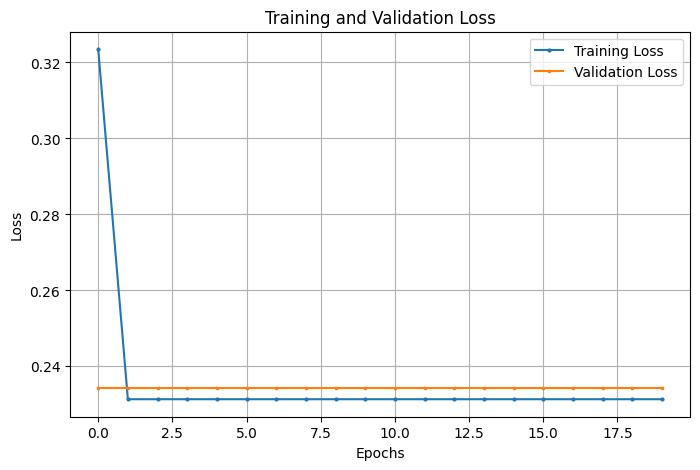

ValueError: Too many bins for data range. Cannot create 30 finite-sized bins.

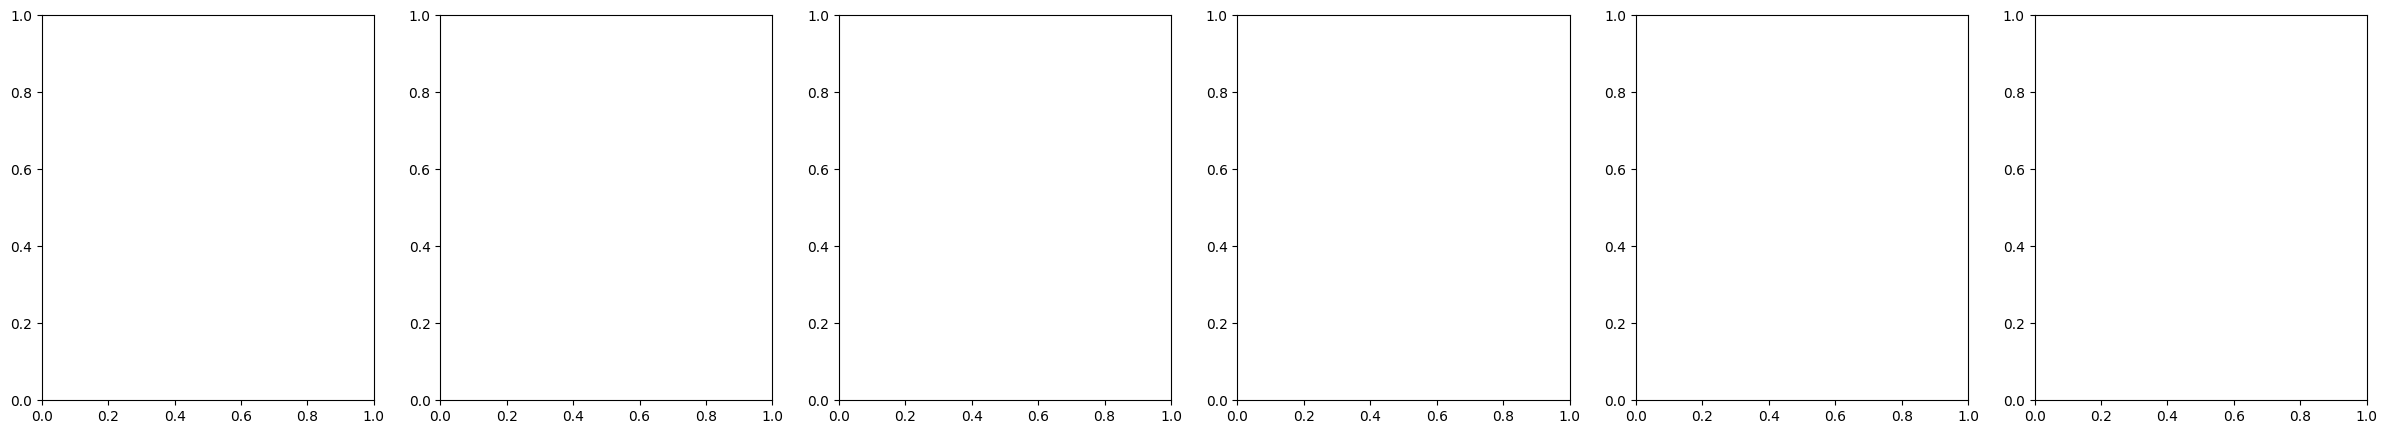

In [8]:
plotter.plot_training_history(ffnn3)
plotter.plot_gradient_distributions(ffnn3)
plotter.plot_weight_distributions(ffnn3)